<a href="https://colab.research.google.com/github/TasnimTamanna02/Detecting_Fake_News/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Fake News with PassiveAggressiveClassifier


**Objective:**
The goal of this project is to build a machine learning model that can automatically classify news articles as real or fake based on their content. Misinformation detection is an important challenge in today's digital world, and this project demonstrates a practical application of natural language processing (NLP) for automated text classification.

**Dataset:**
The dataset contains 6,335 news articles labeled as FAKE or REAL, with fields for title and text content.

**Approach Summary:**

1.   Text cleaning and lemmatization
2.   Feature extraction using TF-IDF vectorization
3.   Model training using PassiveAggressiveClassifier
4.   Evaluation through precision, recall, F1-score, and confusion matrix





## Data Handling

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Detecting Fake News/news.csv')
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


The dataset was loaded from Google Drive into a Pandas DataFrame. It contains 6,335 news articles with the following columns:

*   title - headline of the news article
*   text - full content of the article
*   label - indicates whether the news is REAL or FAKE

The unnecessary index column 'Unnamed: 0' has been removed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


**Observation:**
*   No missing values were found in any column
*   Data types- title and text column are strings, and label is categorical column.

In [ ]:
df['label'].value_counts()

,count
label,
REAL,3171
FAKE,3164


<Axes: xlabel='label', ylabel='count'>

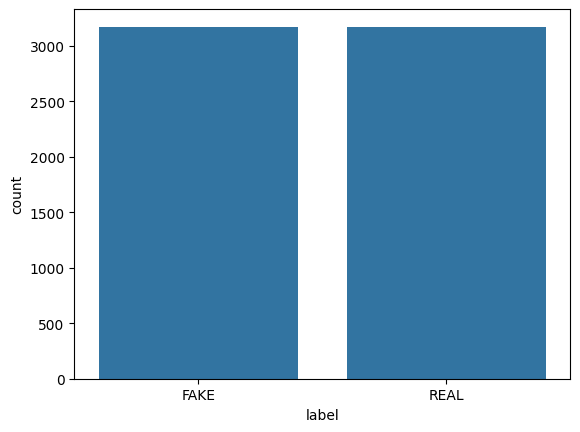

In [ ]:
sns.countplot(x='label', data=df)

**Observation:**
The classes are fairly balanced, which reduces the risk of bias toward one label during training.

## Preprocessing

At this stage we standardize the text to reduce noise and allow the model to focus on meanings. Used methods:


*   Lowercasing the texts

*   Removing punctuations, stopwords, URLs, HTML tags and extra spaces
*   Lemmatization


*   TF-IDF Pipeline



### Cleaning

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [word for word in text.split() if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df[['text', 'clean_text']].head(3)

,text,clean_text
0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,u secretary state john f kerry said monday sto...


The `clean_text` function is applied to the 'text' column to create a new 'clean_text' column. This function performs several cleaning steps:

1. **Lowercasing:** Converts all text to lowercase.
2. **Removing URLs, HTML tags, and extra spaces:** Uses regular expressions to remove web addresses, HTML tags, and any extra whitespace.
3. **Removing punctuation:** Removes all punctuation marks and any special characters.
4. **Removing stopwords:** Removes common English words (like 'the', 'a', 'is') that don't add much meaning.
5. **Lemmatization:** Reduces words to their base or root form


### Train-Test Split

The data is split into training and testing sets (80% training, 20% testing).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=5)

In [ ]:
tfidf = TfidfVectorizer(max_df=0.7)
tf_train = tfidf.fit_transform(X_train)
tf_test = tfidf.transform(X_test)

In [ ]:
y_train.value_counts()

,count
label,
REAL,2541
FAKE,2527


In [ ]:
y_test.value_counts()

,count
label,
FAKE,637
REAL,630


## Model Training (PassiveAggressiveClassifier)

The PassiveAggressiveClassifier is chosen because it is efficient for large-scale text classification tasks, particularly in online learning settings. It updates its weights only when it misclassifies a sample, making it well-suited for streaming or continuously updating datasets like news.

In [ ]:
clf=PassiveAggressiveClassifier(max_iter=80)
clf.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=80)

In [ ]:
y_pred=clf.predict(tf_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       637
        REAL       0.94      0.94      0.94       630

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



## Model Evaluation


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       637
        REAL       0.94      0.94      0.94       630

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [ ]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[597,  40],
       [ 39, 591]])

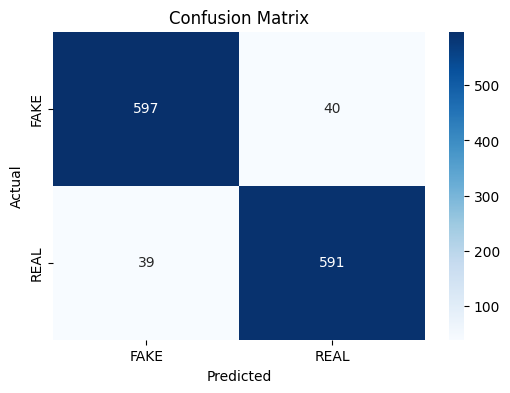

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Analysis of Evaluation Results

Based on the classification report and confusion matrix:

*   **Accuracy:** The model achieved an accuracy of 0.94, indicating it correctly classified 94% of the news articles in the test set.
*   **Precision, Recall, and F1-score:** The precision, recall, and f1-score for both 'FAKE' and 'REAL' classes are also 0.94. This suggests the model performs equally well in identifying both fake and real news.
    *   **Precision:** Of all the articles the model predicted as 'FAKE', 94% were actually 'FAKE'. Similarly, of all the articles the model predicted as 'REAL', 94% were actually 'REAL'.
    *   **Recall:** The model correctly identified 94% of all the 'FAKE' articles and 94% of all the 'REAL' articles.
    *   **F1-score:** The high F1-score of 0.94 for both classes indicates strong performance.
*   **Confusion Matrix:**
    *   **True Positives (FAKE):** 597 articles were correctly identified as 'FAKE'.
    *   **True Negatives (REAL):** 591 articles were correctly identified as 'REAL'.
    *   **False Positives (Type I error):** 40 articles were incorrectly classified as 'FAKE' when they were actually 'REAL'.
    *   **False Negatives (Type II error):** 39 articles were incorrectly classified as 'REAL' when they were actually 'FAKE'.

Overall, the PassiveAggressiveClassifier model demonstrates strong performance in distinguishing between fake and real news based on the provided dataset, with a balanced ability to identify both classes.